# The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Score: 0.7995

In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Data analysis



In [2]:
train = pd.read_csv("C:/Users/ph13a/Downloads/train.csv")
test = pd.read_csv("C:/Users/ph13a/Downloads/test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
num = 10
train.head(num)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
print(pd.isnull(test).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Cabin correlation

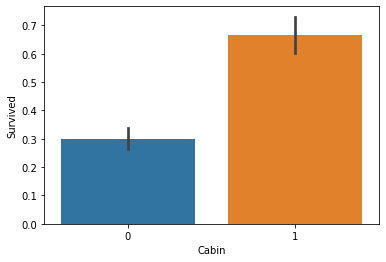

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot()
sns.barplot(x=train["Cabin"].notna().astype('int'), y='Survived', data=train, ax=ax1)

In [8]:
pd.crosstab(train['Pclass'], train["Cabin"].notna().astype('int'))

Cabin,0,1
Pclass,,
1,40,176
2,168,16
3,479,12


In [9]:
pd.crosstab(train['Pclass'], train["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [10]:
train['Cabin'].loc[~train['Cabin'].isnull()] = 1  
train['Cabin'].loc[train['Cabin'].isnull()] = 0
test['Cabin'].loc[~test['Cabin'].isnull()] = 1  
test['Cabin'].loc[test['Cabin'].isnull()] = 0

C:\Users\ph13a\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


# Title Correlation

In [11]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [12]:
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [13]:
train[train['Title'] == 'Major']    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.50,1,S,Major
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.55,1,S,Major


In [14]:
pd.crosstab(train['Sex'], train['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [15]:
train['Title'] = train['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
                                      , 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [16]:
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(test['Title'], test['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [17]:
test['Title'] = test['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
                                      , 'Rare')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [18]:
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Rare,15,8


In [19]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


# Data Viz

If the changes in the data impacted te correlations at the dataframe

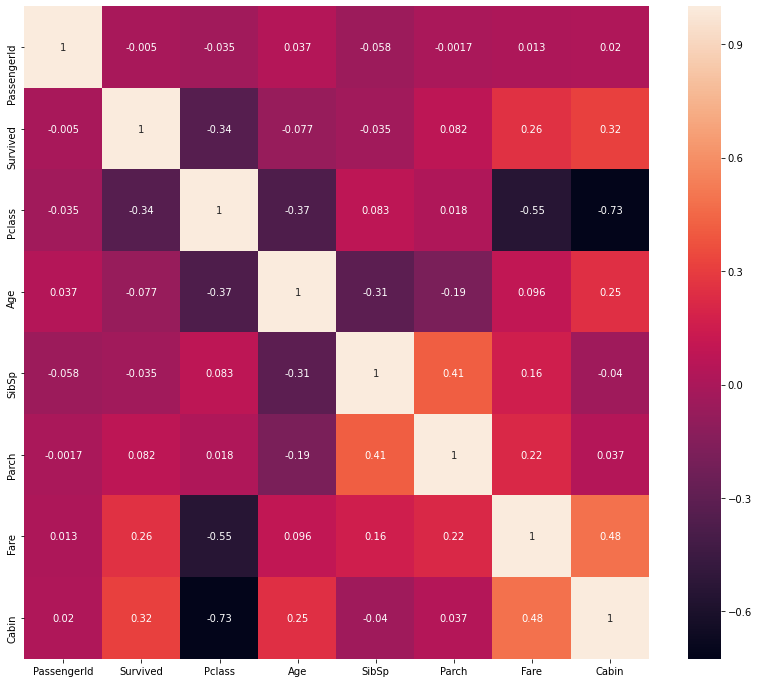

In [20]:
f, ax = plt.subplots(figsize=(14,12))
sns.heatmap(train.corr(), annot=True)

In [21]:
train['Ticket'] = train['Ticket'].str.replace(r'\D', '0')
train['Ticket'] = train['Ticket'].astype('int')

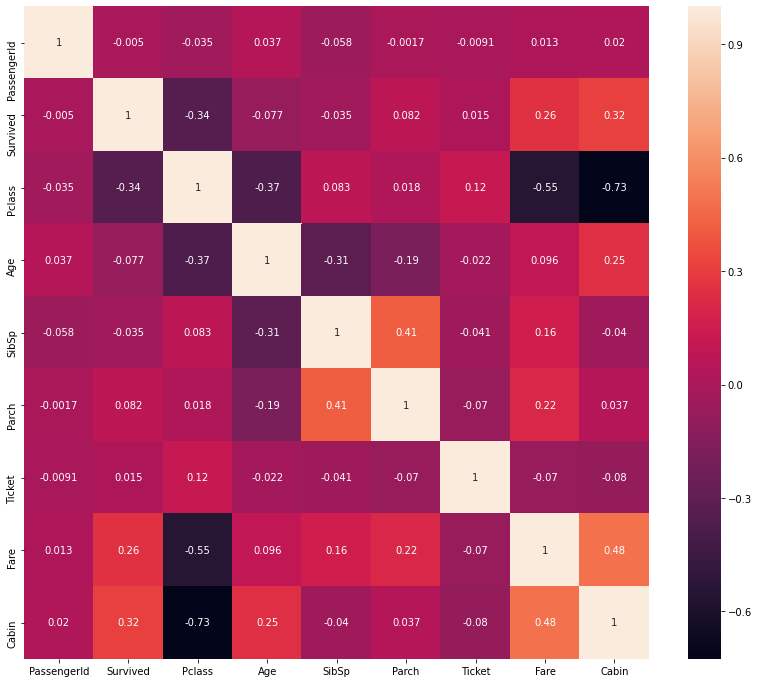

In [22]:
f, ax = plt.subplots(figsize=(14,12))
sns.heatmap(train.corr(), annot=True)

# Drop

Drop Name after created the cloumn title, and ticktet, I did not find a correlation

In [23]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)


# Age and Fare

created a ageband and a fareband in order to improve the ML

In [24]:
train['Age'].loc[train['Age'].isnull()] = train['Age'].median()
train['AgeBand'] = pd.cut(train['Age'], bins=[0, 10, 18, 25, 35, 45, 55, 65, 99], labels=[1,2,3,4,5,6,7,8])
test['Age'].loc[test['Age'].isnull()] = train['Age'].median()
test['AgeBand'] = pd.cut(test['Age'], bins=[0, 10, 18, 25, 35, 45, 55, 65, 99], labels=[1,2,3,4,5,6,7,8])

In [25]:
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)


test['Fare'].loc[test['Fare'].isnull()] = train['Fare'].median()
train['FareBand'] = pd.qcut(train['Fare'], 5, labels = [1, 2, 3, 4,5])
pd.crosstab(train['FareBand'], train['Survived'])

Survived,0,1
FareBand,,
1,140,39
2,147,37
3,99,73
4,100,80
5,63,113


In [26]:
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=True).mean()

,Survived
FareBand,
1,0.217877
2,0.201087
3,0.424419
4,0.444444
5,0.642045


In [27]:
test['FareBand'] = pd.qcut(test['Fare'],  5, labels = [1, 2, 3, 4,5])
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [28]:
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,male,1,0,0,S,Mr,3,1
1,2,1,1,female,1,0,1,C,Mrs,5,5
2,3,1,3,female,0,0,0,S,Miss,4,2
3,4,1,1,female,1,0,1,S,Mrs,4,5
4,5,0,3,male,0,0,0,S,Mr,4,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,0,S,Rare,4,3
887,888,1,1,female,0,0,1,S,Miss,3,4
888,889,0,3,female,1,2,0,S,Miss,4,4
889,890,1,1,male,0,0,1,C,Mr,4,4


# Dummies

Use of get_dummies to columns which are categorical

In [29]:
train = pd.get_dummies(train, columns=['Sex','Title','FareBand','Pclass','Embarked','AgeBand'])
test = pd.get_dummies(test, columns=['Sex','Title','FareBand','Pclass','Embarked','AgeBand'])
train

,PassengerId,Survived,SibSp,Parch,Cabin,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Embarked_Q,Embarked_S,AgeBand_1,AgeBand_2,AgeBand_3,AgeBand_4,AgeBand_5,AgeBand_6,AgeBand_7,AgeBand_8
0,1,0,1,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,2,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,4,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
887,888,1,0,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
888,889,0,1,2,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
889,890,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split

X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [31]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel='rbf', C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]
acc_=[]
log_cols = ['Classifier', 'Accuracy', 'Log Loss']
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print('--'*30)
    print(name)
    
    print('****Results****')
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_.append(accuracy_score(y_test, y_pred))
    print('Accuracy: {:.4%}'.format(acc))
    
    y_pred = clf.predict_proba(X_test)
    ll = log_loss(y_test, y_pred)
    print('Log Loss {}:'.format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
    print('--'*30)

------------------------------------------------------------
KNeighborsClassifier
****Results****
Accuracy: 81.5642%
Log Loss 2.7353504686043397:
------------------------------------------------------------
------------------------------------------------------------
SVC
****Results****
Accuracy: 68.1564%
Log Loss 0.4657150601450603:
------------------------------------------------------------
------------------------------------------------------------
NuSVC
****Results****
Accuracy: 82.1229%
Log Loss 0.47183590343471:
------------------------------------------------------------
------------------------------------------------------------
DecisionTreeClassifier
****Results****
Accuracy: 81.0056%
Log Loss 3.8418858709305868:
------------------------------------------------------------
------------------------------------------------------------
RandomForestClassifier
****Results****
Accuracy: 84.3575%
Log Loss 0.47318014644345624:
-------------------------------------------------------

C:\Users\ph13a\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


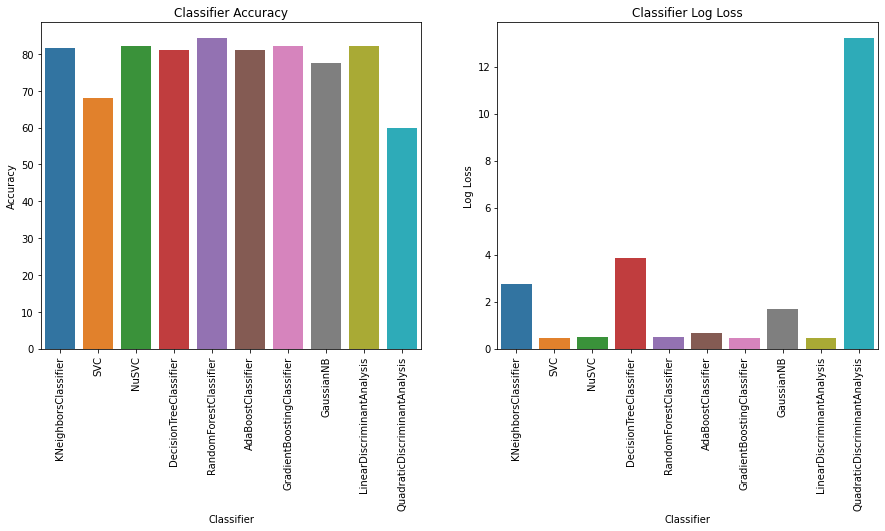

In [32]:
f, ax = plt.subplots(1, 2, figsize=(15,6))

sns.barplot(x='Classifier', y='Accuracy', data=log, ax=ax[0])
ax[0].set_title('Classifier Accuracy')
ax[0].tick_params(axis='x', labelrotation=90)

sns.barplot(x='Classifier', y='Log Loss', data=log, ax=ax[1])
ax[1].set_title('Classifier Log Loss')
ax[1].tick_params(axis='x', labelrotation=90)

plt.show();

In [33]:
estimator = GradientBoostingClassifier()
estimator.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

# Hyper params

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

GBC = GradientBoostingClassifier()

parameters =  {
                  'learning_rate': [0.01,0.02,0.03],
                  'n_estimators':[80,90,100,110],  
                  'max_depth':[6,7,8,9], 
                  'min_samples_leaf':[4,5,6,7], 
                  'max_features':[0.9,1.0] 
}

GBC_random = RandomizedSearchCV(estimator=GBC, param_distributions=parameters,cv = 2, n_iter = 10, n_jobs=-1)

GBC_random.fit(X_train, y_train)
%time GBC_random.best_params_

Wall time: 0 ns


{'n_estimators': 100,
 'min_samples_leaf': 7,
 'max_features': 1.0,
 'max_depth': 7,
 'learning_rate': 0.02}

In [35]:
GBC.fit(X_train, y_train)
final_df = pd.DataFrame(GBC.predict_proba(X_test),columns=('P0','P1'))
final_df['Classification'] = np.where(final_df['P0']>0.55, 0, 1)

In [36]:
accuracy_score(final_df['Classification'].values, y_test)

0.8212290502793296

In [ ]:
parameters =  {
                  'learning_rate': [0.01,0.011],
                  'n_estimators':[108,109,110],  
                  'max_depth':[6,7,8], 
                  'min_samples_leaf':[9,10,11], 
                  'max_features':[0.6,0.7,0.8] 
}


grid_search = GridSearchCV(estimator = GBC, param_grid = parameters, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
%time grid_search.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.1s


In [ ]:
# Best cross validation score
print('Cross Validation Score:', grid_search.best_score_, '\n')

# Best parameters which resulted in the best score
print('Best Parameters:', grid_search.best_params_)

best_grid = grid_search.best_estimator_
best_grid

In [ ]:
from sklearn.model_selection import cross_val_score

validation = cross_val_score(best_grid, X, y, cv=5)
print(validation, '\n')
print('Cross validation mean:', np.mean(validation))

In [ ]:
ids = test['PassengerId']
predictions = best_grid.predict(test.drop('PassengerId', axis=1))

output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
output.head()